<a href="https://colab.research.google.com/github/ghrahul/Machine_learning_and_deep_learning_tutorial_and_practice/blob/master/Linear_Regression/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing libraries
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [0]:
#parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [0]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [6]:
#tf graph input
X = tf.placeholder(float)
Y = tf.placeholder(float)

#set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# construction of linear model
pred = tf.add(tf.multiply(X,W), b)

In [8]:
#mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
#gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.cast instead.


In [0]:
#initialize variables
init = tf.global_variables_initializer()


Optimization Finished!
Training cost
0.07700173
W
0.24796343
b
0.8131935


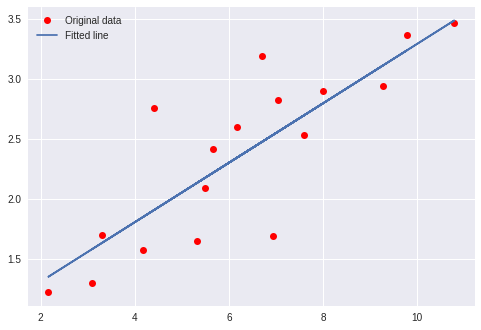

In [17]:
#start training
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        #if (epoch+1) % display_step == 0:
            #c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            #print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                #"W=", sess.run(W), "b=", sess.run(b)

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost")
    print(training_cost)
    print("W")
    print(sess.run(W))
    print("b")
    print(sess.run(b))
   

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()